In [2]:
# Imports for finding files
import sys
import os
import subprocess

from six import string_types

# Make sure you have all of these packages installed, e.g. via pip
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy
from skimage import io
from scipy import ndimage
from IPython.display import display
%matplotlib inline

In [3]:
# Prelim data exploration
data = pd.read_csv("train_v2.csv")
print str(data.shape[0]) + " images in dataset" 
data.head()

40479 images in dataset


,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


## Data just shows image name and tags. Need to separate out tags into other columns

In [5]:
# Build list with unique labels
label_list = []
for tag_str in data.tags.values:
    labels = tag_str.split(' ')
    for label in labels:
        if label not in label_list:
            label_list.append(label)
            
# list of labels
print label_list

['haze', 'primary', 'agriculture', 'clear', 'water', 'habitation', 'road', 'cultivation', 'slash_burn', 'cloudy', 'partly_cloudy', 'conventional_mine', 'bare_ground', 'artisinal_mine', 'blooming', 'selective_logging', 'blow_down']


In [6]:
# Add onehot features for every label
for label in label_list:
    data[label] = data['tags'].apply(lambda x: 1 if label in x.split(' ') else 0)
# Display head
data.head()

,image_name,tags,haze,primary,agriculture,clear,water,habitation,road,cultivation,slash_burn,cloudy,partly_cloudy,conventional_mine,bare_ground,artisinal_mine,blooming,selective_logging,blow_down
0,train_0,haze primary,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,train_1,agriculture clear primary water,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,train_2,clear primary,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,train_3,clear primary,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,train_4,agriculture clear habitation primary road,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0


# of primary rainforest: 37513
# of agriculture rainforest: 12315


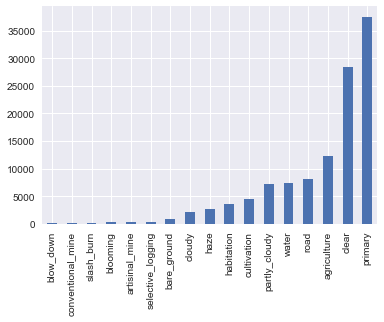

In [13]:
# Visualization of labels

print "# of primary rainforest: {}".format(data[data.primary==1].shape[0])
print "# of agriculture rainforest: {}".format(data[data.agriculture==1].shape[0])
data[label_list].sum().sort_values().plot.bar()

In [27]:
# Percentage of labels via mean value counts
print data[label_list].mean().sort_values(ascending=False)

primary              0.926727
clear                0.702364
agriculture          0.304232
road                 0.199387
water                0.183083
partly_cloudy        0.179377
cultivation          0.110601
habitation           0.090417
haze                 0.066627
cloudy               0.051607
bare_ground          0.021295
selective_logging    0.008399
artisinal_mine       0.008375
blooming             0.008202
slash_burn           0.005163
conventional_mine    0.002470
blow_down            0.002421
dtype: float64


In [29]:
# Number of l
print data[label_list].sum().sort_values(ascending=False)

primary              37513
clear                28431
agriculture          12315
road                  8071
water                 7411
partly_cloudy         7261
cultivation           4477
habitation            3660
haze                  2697
cloudy                2089
bare_ground            862
selective_logging      340
artisinal_mine         339
blooming               332
slash_burn             209
conventional_mine      100
blow_down               98
dtype: int64


Creating heatmap to visualize correlations (Took from an example workbook)

,haze,primary,agriculture,clear,water,habitation,road,cultivation,slash_burn,cloudy,partly_cloudy,conventional_mine,bare_ground,artisinal_mine,blooming,selective_logging,blow_down
haze,2697,2670,672,0,613,129,394,202,3,0,0,2,41,5,4,5,0
primary,2670,37513,11972,27668,7001,3469,7728,4455,209,0,7175,94,683,324,332,340,98
agriculture,672,11972,12315,9150,2712,2737,6034,3377,119,0,2493,24,225,38,32,65,22
clear,0,27668,9150,28431,5502,3090,6295,3527,173,0,0,70,747,307,311,308,85
water,613,7001,2712,5502,7411,915,2125,868,24,0,1295,26,206,299,16,49,3
habitation,129,3469,2737,3090,915,3660,2786,895,41,0,441,36,163,29,4,13,3
road,394,7728,6034,6295,2125,2786,8071,1294,36,0,1382,59,323,110,10,151,2
cultivation,202,4455,3377,3527,868,895,1294,4477,126,0,748,4,89,18,35,58,8
slash_burn,3,209,119,173,24,41,36,126,209,0,33,0,10,0,2,2,2
cloudy,0,0,0,0,0,0,0,0,0,2089,0,0,0,0,0,0,0


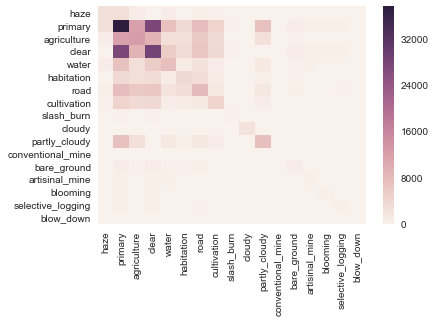

In [31]:
# Counts values of tags with other tags
def make_cooccurence_matrix(labels):
    numeric_df = data[labels]; 
    c_matrix = numeric_df.T.dot(numeric_df)
    sns.heatmap(c_matrix)
    return c_matrix
    
# Compute the co-ocurrence matrix
make_cooccurence_matrix(label_list)

The above is quite a large mess, so lets separate out tags into groups

,primary,agriculture,water,cultivation,habitation
primary,37513,11972,7001,4455,3469
agriculture,11972,12315,2712,3377,2737
water,7001,2712,7411,868,915
cultivation,4455,3377,868,4477,895
habitation,3469,2737,915,895,3660


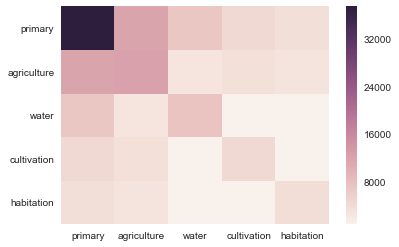

In [33]:
land_labels = ['primary', 'agriculture', 'water', 'cultivation', 'habitation']
make_cooccurence_matrix(land_labels)

,slash_burn,conventional_mine,bare_ground,artisinal_mine,blooming,selective_logging,blow_down
slash_burn,209,0,10,0,2,2,2
conventional_mine,0,100,10,4,0,0,0
bare_ground,10,10,862,40,3,13,4
artisinal_mine,0,4,40,339,0,6,0
blooming,2,0,3,0,332,7,1
selective_logging,2,0,13,6,7,340,1
blow_down,2,0,4,0,1,1,98


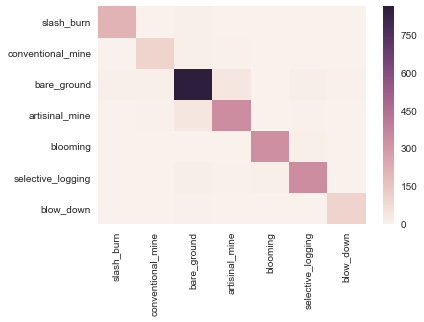

In [34]:
rare_labels = [l for l in label_list if data[label_list].sum()[l] < 2000]
make_cooccurence_matrix(rare_labels)

## Let's look at some images!

In [74]:
# Pull a list of 20000 image names
jpg_list = os.listdir("train-jpg")[:20000]
# Select a random sample of 100 among those
np.random.shuffle(jpg_list)
jpg_list = jpg_list[:100]
print(jpg_list)

['train_19232.jpg', 'train_21961.jpg', 'train_21749.jpg', 'train_24362.jpg', 'train_21051.jpg', 'train_13424.jpg', 'train_11664.jpg', 'train_19886.jpg', 'train_21994.jpg', 'train_24433.jpg', 'train_24901.jpg', 'train_23622.jpg', 'train_13640.jpg', 'train_21789.jpg', 'train_23625.jpg', 'train_21779.jpg', 'train_18140.jpg', 'train_14382.jpg', 'train_20667.jpg', 'train_18152.jpg', 'train_15365.jpg', 'train_2640.jpg', 'train_14883.jpg', 'train_12847.jpg', 'train_18075.jpg', 'train_18574.jpg', 'train_19356.jpg', 'train_12796.jpg', 'train_25998.jpg', 'train_15488.jpg', 'train_15296.jpg', 'train_19815.jpg', 'train_16272.jpg', 'train_1332.jpg', 'train_26843.jpg', 'train_2398.jpg', 'train_2376.jpg', 'train_27010.jpg', 'train_1534.jpg', 'train_21333.jpg', 'train_13571.jpg', 'train_11816.jpg', 'train_27342.jpg', 'train_11645.jpg', 'train_27628.jpg', 'train_18613.jpg', 'train_15900.jpg', 'train_20584.jpg', 'train_21212.jpg', 'train_13956.jpg', 'train_19315.jpg', 'train_12459.jpg', 'train_14837.jpg

In [94]:
# Creates an array of rgb colors to calibrate images
ref_colors = [[],[],[]]
for _file in jpg_list:
    # keep only the first 3 bands, RGB
    _img = mpimg.imread(os.path.join("train-jpg", _file))[:,:,:3]
    # Flatten 2-D to 1-D
    _data = _img.reshape((-1,3))
    # Dump pixel values to aggregation buckets
    for i in range(3): 
        ref_colors[i] = ref_colors[i] + _data[:,i].tolist()
    
ref_colors = np.array(ref_colors)
ref_colors

array([[ 66,  69,  77, ..., 143, 143, 143],
       [ 65,  70,  75, ..., 148, 148, 148],
       [ 38,  43,  49, ..., 129, 129, 129]])

In [76]:
ref_means = [np.mean(ref_colors[i]) for i in range(3)]
ref_stds = [np.std(ref_colors[i]) for i in range(3)]

In [77]:
def calibrate_image(rgb_image):
    # Transform test image to 32-bit floats to avoid 
    # surprises when doing arithmetic with it 
    calibrated_img = rgb_image.copy().astype('float32')

    # Loop over RGB
    for i in range(3):
        # Subtract mean 
        calibrated_img[:,:,i] = calibrated_img[:,:,i]-np.mean(calibrated_img[:,:,i])
        # Normalize variance
        calibrated_img[:,:,i] = calibrated_img[:,:,i]/np.std(calibrated_img[:,:,i])
        # Scale to reference 
        calibrated_img[:,:,i] = calibrated_img[:,:,i]*ref_stds[i] + ref_means[i]
        # Clip any values going out of the valid range
        calibrated_img[:,:,i] = np.clip(calibrated_img[:,:,i],0,255)

    # Convert to 8-bit unsigned int
    return calibrated_img.astype('uint8')

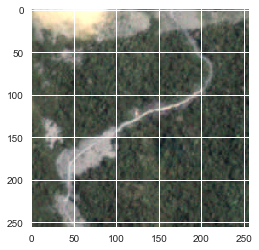

In [78]:
test_image_calibrated = calibrate_image(rgb_image)
plt.imshow(test_image_calibrated)

In [79]:
def sample_images(tags, n=None):
    """Randomly sample n images with the specified tags."""
    condition = True
    if isinstance(tags, string_types):
        raise ValueError("Pass a list of tags, not a single tag.")
    for tag in tags:
        condition = condition & data[tag] == 1
    if n is not None:
        return data[condition].sample(n)
    else:
        return data[condition]
    
def load_image(filename):
    '''Look through the directory tree to find the image you specified
    (e.g. train_10.tif vs. train_10.jpg)'''
    for dirname in os.listdir("."):
        path = os.path.abspath(os.path.join(".", dirname, filename))
        if os.path.exists(path):
            print('Found image {}'.format(path))
            return io.imread(path)
    # if you reach this line, you didn't find the image you're looking for
    print('Load failed: could not find image {}'.format(path))
    
def sample_to_fname(sample_df, row_idx, suffix='jpg'):
    '''Given a dataframe of sampled images, get the
    corresponding filename.'''
    fname = sample_df.get_value(sample_df.index[row_idx], 'image_name')
    return '{}.{}'.format(fname, suffix)

Found image C:\Users\simpl\Documents\ds-dc-19\final-projects\train-jpg\train_8307.jpg


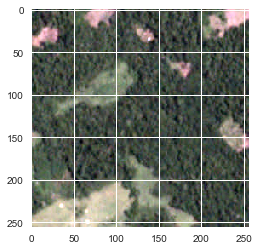

In [91]:
sampled_images = sample_images(['habitation'], n=1)

for i in range(len(sampled_images)):
    jpg = sample_to_fname(sampled_images, i, 'jpg')

    try:
        jpg_img = load_image(jpg)[:,:,:3]

        fig = plt.figure()
        plt.imshow(calibrate_image(jpg_img))
    except:
        continue

## Lets try some machine learning

In [210]:
data.head(1)

,image_name,tags,haze,primary,agriculture,clear,water,habitation,road,cultivation,slash_burn,cloudy,partly_cloudy,conventional_mine,bare_ground,artisinal_mine,blooming,selective_logging,blow_down
0,train_0,haze primary,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [326]:
# Able to get y values but need to pull image pixels to get X values

# Pull a list of 20000 image names
jpg_list = os.listdir("train-jpg")[:20000]
# Select one
np.random.shuffle(jpg_list)
jpg_list = jpg_list[:100]

index = []
for _file in jpg_list:
    index.append(_file[:-4])

y= data.drop(["tags"], axis=1)
y = y[y['image_name'].isin(index)]
print y.shape
y.head()

(100, 18)


,image_name,haze,primary,agriculture,clear,water,habitation,road,cultivation,slash_burn,cloudy,partly_cloudy,conventional_mine,bare_ground,artisinal_mine,blooming,selective_logging,blow_down
25,train_25,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
142,train_142,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0
1081,train_1081,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1906,train_1906,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2157,train_2157,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0


In [328]:
def pixel_values_to_df(jpg_list, df):
    print "processing images"
    for _file in jpg_list:        
        # keep only the first 3 bands, RGB
        _img = mpimg.imread(os.path.join("train-jpg", _file))[:,:,:3]
        
        # Flatten 2-D to 1-D
        _data = _img.reshape((3,-1))
        
        # Dump pixel values to list
        for i in range(65536): 
            pixel = _data[:,i].tolist()
            ref_colors.append(pixel)
            
        # Set Values in dataframe
        for i in range(65536):
            df.set_value(_file,i,ref_colors[i])
    print "done processing"
    return df

In [ ]:
df = pd.DataFrame(index=jpg_list, columns=np.arange(65536))
X = pixel_values_to_df(jpg_list, df)
X.index.name = 'image_name'
X.reset_index(inplace=True)

processing images


In [324]:
print "Image Tags"
print y.shape
y.head()

Image Tags
(100, 18)


,image_name,haze,primary,agriculture,clear,water,habitation,road,cultivation,slash_burn,cloudy,partly_cloudy,conventional_mine,bare_ground,artisinal_mine,blooming,selective_logging,blow_down
1045,train_1045,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0
1172,train_1172,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1552,train_1552,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0
1664,train_1664,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0
1688,train_1688,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [325]:
# Verify data is formatted correctly
print "Pixel Data"
print X.shape
X.head()

Pixel Data
(100, 65537)


,image_name,0,1,2,3,4,5,6,7,8,...,65526,65527,65528,65529,65530,65531,65532,65533,65534,65535
0,train_12679.jpg,"[58, 35, 32]","[49, 11, 79]","[24, 59, 57]","[60, 41, 33]","[49, 18, 79]","[23, 64, 56]","[61, 46, 32]","[48, 26, 77]","[23, 59, 53]",...,"[54, 54, 30]","[35, 29, 88]","[14, 76, 60]","[45, 55, 32]","[29, 29, 90]","[9, 77, 62]","[47, 56, 32]","[31, 30, 90]","[9, 79, 63]","[53, 57, 31]"
1,train_18418.jpg,"[58, 35, 32]","[49, 11, 79]","[24, 59, 57]","[60, 41, 33]","[49, 18, 79]","[23, 64, 56]","[61, 46, 32]","[48, 26, 77]","[23, 59, 53]",...,"[54, 54, 30]","[35, 29, 88]","[14, 76, 60]","[45, 55, 32]","[29, 29, 90]","[9, 77, 62]","[47, 56, 32]","[31, 30, 90]","[9, 79, 63]","[53, 57, 31]"
2,train_1552.jpg,"[58, 35, 32]","[49, 11, 79]","[24, 59, 57]","[60, 41, 33]","[49, 18, 79]","[23, 64, 56]","[61, 46, 32]","[48, 26, 77]","[23, 59, 53]",...,"[54, 54, 30]","[35, 29, 88]","[14, 76, 60]","[45, 55, 32]","[29, 29, 90]","[9, 77, 62]","[47, 56, 32]","[31, 30, 90]","[9, 79, 63]","[53, 57, 31]"
3,train_1688.jpg,"[58, 35, 32]","[49, 11, 79]","[24, 59, 57]","[60, 41, 33]","[49, 18, 79]","[23, 64, 56]","[61, 46, 32]","[48, 26, 77]","[23, 59, 53]",...,"[54, 54, 30]","[35, 29, 88]","[14, 76, 60]","[45, 55, 32]","[29, 29, 90]","[9, 77, 62]","[47, 56, 32]","[31, 30, 90]","[9, 79, 63]","[53, 57, 31]"
4,train_20900.jpg,"[58, 35, 32]","[49, 11, 79]","[24, 59, 57]","[60, 41, 33]","[49, 18, 79]","[23, 64, 56]","[61, 46, 32]","[48, 26, 77]","[23, 59, 53]",...,"[54, 54, 30]","[35, 29, 88]","[14, 76, 60]","[45, 55, 32]","[29, 29, 90]","[9, 77, 62]","[47, 56, 32]","[31, 30, 90]","[9, 79, 63]","[53, 57, 31]"


In [ ]:
# Training and Test Data Split
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.4, random_state=42)